In [85]:
import pandas as pd

In [133]:
df=pd.read_csv("../Dataset/All_Diagnosis_data.csv")

/tmp/ipykernel_2054203/2721532328.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../Dataset/All_Diagnosis_data.csv")


In [134]:
df.head()

media_id    gender location_of_lesion diagnose  \
0  rmidma7gymnaitdhcod8ha7v788h  Männlich     ["Arm(Links)"]   Naevus   
1  nx09c4jck1tarotrjqalma3o4vr7  Männlich     ["Arm(Links)"]   Naevus   
2  ui7rm2ny1mv206n6xnmmxo4lvat7  Männlich     ["Arm(Links)"]   Naevus   
3  5jhvutey5u7var15twyphp5inf6i  Männlich    ["Arm(Rechts)"]    Ekzem   
4  jow01q0wqvhwp894cfg0inn6vcmv  Männlich    ["Arm(Rechts)"]    Ekzem   

                                               image allergies  \
0  all_diagnoses/images/rmidma7gymnaitdhcod8ha7v788h      Nein   
1  all_diagnoses/images/nx09c4jck1tarotrjqalma3o4vr7      Nein   
2  all_diagnoses/images/ui7rm2ny1mv206n6xnmmxo4lvat7      Nein   
3  all_diagnoses/images/5jhvutey5u7var15twyphp5inf6i      Nein   
4  all_diagnoses/images/jow01q0wqvhwp894cfg0inn6vcmv      Nein   

  duration_of_lesion allergies.1 medication social_proximity pregnancy  \
0  3 Monate - 1 Jahr        Nein         Ja             Nein       NaN   
1  3 Monate - 1 Jahr        Nein         Ja             Nein       NaN   
2  3 Monate - 1 Jahr        Nein         Ja             Nein       NaN   
3         < 2 Wochen        Nein         Ja             Nein       NaN   
4         < 2 Wochen        Nein         Ja             Nein       NaN   

  unprotected_sex  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [66]:
df.rename(columns={'id': 'media_id', 'Consolidated Diagnosis': 'diagnose'}, inplace=True)

In [67]:
#image_bucket_name = 'labeled-data'
#image_bucket_name =  

In [47]:
len(df)

495688

In [48]:
df["image"][0]

'all_diagnoses/images/rmidma7gymnaitdhcod8ha7v788h'

In [94]:
# ID to check
id_to_check = '4ej4exnv1w3pnantor3i2qmp5dg6'

# Check if the ID exists
id_exists = id_to_check in df["media_id"].values

print("ID exists in dataset:", id_exists)

ID exists in dataset: True


In [49]:
diagnose_counts = df["Consolidated Diagnosis"].value_counts()

KeyError: 'Consolidated Diagnosis'

In [50]:
print(diagnose_counts)

Consolidated Diagnosis
Ekzem                              62216
Acne                               57522
Tinea                              26310
Irritative Dermatitis              21642
Naevus                             16630
                                   ...  
Scharlach                              3
Alopecia triangularis congenita        3
Hautatrophie                           3
Ohrfistel                              3
Calcinosis cutis                       3
Name: count, Length: 608, dtype: int64


In [51]:
# Print unique values
# print("Unique ICD Codes:", df["icd_code"].unique())
# print("Unique Diagnoses:", df["diagnose"].unique())
# print("Unique Diagnose Types:", df["diagnose_type"].unique())


In [52]:
# import boto3
# import io
# import pandas as pd
# from botocore.client import Config
# from PIL import Image
# import matplotlib.pyplot as plt

# # AWS S3 Configuration (Use Environment Variables for Security)
# access_key = 'UAZG5H4B22JSKAB0NETK'
# secret = 'YuZ4hC9NORjRVhK84xbPufzS9dBtzv4pqSAtYZZR'
# #image_bucket_name = 'labeled-data'
# image_bucket_name =  'diagnostix-prod'
# region_name = 'eu-de'
# endpoint_url = 'https://obs.eu-de.otc.t-systems.com'

# # Initialize S3 Client
# session = boto3.session.Session()
# s3_client = session.client(
#     service_name='s3',
#     aws_access_key_id=access_key,
#     aws_secret_access_key=secret,
#     endpoint_url=endpoint_url,
#     config=Config(signature_version='s3v4')
# )


In [57]:
df4 = pd.read_csv('../../train_lesion_segmentation/csv_files/segmentation_training_data.csv')

In [58]:
df4.head()

Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0             0             0             0        7482   
1             1             1             1        7483   
2             2             2             2        7484   
3             3             3             3        7485   
4             4             4             4        7486   

                                               masks  \
0  mask/0000d32f-b030-43eb-b8fc-10fab564e98d/medi...   
1  mask/0002bacf-f6ae-4479-b1e1-34785fd40bfe/medi...   
2  mask/0006db3f-f0de-434f-b99b-2d62e2a22a63/medi...   
3  mask/000ed50f-3538-43ad-bd2b-7fac6eb1e421/medi...   
4  mask/000f253b-2ec7-47d4-bbc0-42c47ff2060d/medi...   

                                           image_key data_structure  \
0  images/0000d32f-b030-43eb-b8fc-10fab564e98d/me...       new_data   
1  images/0002bacf-f6ae-4479-b1e1-34785fd40bfe/me...       new_data   
2  images/0006db3f-f0de-434f-b99b-2d62e2a22a63/me...       new_data   
3  images/000ed50f-3538-43ad-bd2b-7fac6eb1e421/me...       new_data   
4  images/000f253b-2ec7-47d4-bbc0-42c47ff2060d/me...       new_data   

            bucket   score  
0  diagnostix-prod  blurry  
1  diagnostix-prod       4  
2  diagnostix-prod       4  
3  diagnostix-prod  blurry  
4  diagnostix-prod       3

In [78]:
import pandas as pd

# Assuming df and df2 are already loaded as DataFrames
matches = []
match_data = []  # List to store media_id and image_name for CSV output
match_count = 0

# Iterate through each media_id in df
for media_id in df['media_id']:
    # Check if media_id exists as part of the image_name in df2
    match = df4['image_key'].str.contains(str(media_id), na=False)
    
    if match.any():
        # For every match, append the media_id and corresponding image_name
        matching_rows = df4[match]
        for index, row in matching_rows.iterrows():
            match_data.append({'media_id': media_id, 'image_key': row['image_key']})
        
        match_count += 1
        
        # Print every 30 matches
        if match_count % 30 == 0:
            print(f"{match_count} matches found so far.")
        
        # Write to CSV every 50 matches
        if match_count % 50 == 0:
            df_matches = pd.DataFrame(match_data)
            df_matches.to_csv('matched_data3.csv', index=False)
            print(f"CSV file updated with {match_count} matches.")
    
    # Append whether match was found or not
    matches.append(match.any())

# If there are any remaining matches that haven't been written to the CSV, do so now
if match_count % 50 != 0:
    df_matches = pd.DataFrame(match_data)
    df_matches.to_csv('matched_data3.csv', index=False)
    print(f"CSV file updated with the final {match_count} matches.")
    
# Add the match status as a column in df
df['match_found'] = matches

30 matches found so far.
CSV file updated with 50 matches.
60 matches found so far.
90 matches found so far.
CSV file updated with 100 matches.
120 matches found so far.
150 matches found so far.
CSV file updated with 150 matches.
180 matches found so far.
CSV file updated with 200 matches.
210 matches found so far.
240 matches found so far.
CSV file updated with 250 matches.
270 matches found so far.
300 matches found so far.
CSV file updated with 300 matches.
330 matches found so far.
CSV file updated with 350 matches.
360 matches found so far.
390 matches found so far.
CSV file updated with 400 matches.
420 matches found so far.
450 matches found so far.
CSV file updated with 450 matches.
480 matches found so far.
CSV file updated with 500 matches.
510 matches found so far.
540 matches found so far.
CSV file updated with 550 matches.
570 matches found so far.
600 matches found so far.
CSV file updated with 600 matches.
630 matches found so far.
CSV file updated with 650 matches.
660

In [77]:
# import pandas as pd

# # Ensure df and df4 are loaded properly
# matches = []
# match_data = []  # List to store complete matched rows from df4
# match_count = 0

# # Iterate through each media_id in df
# for media_id in df['media_id']:
#     # Check if media_id exists as part of the image_key in df4
#     match = df4['image_key'].astype(str).str.contains(str(media_id), na=False)

#     if match.any():
#         # Store all matching rows from df4 (full rows)
#         matching_rows = df4[match].copy()  # Ensure it's a copy to avoid warnings
#         matching_rows['media_id'] = media_id  # Add media_id column for reference

#         # Append all matching rows
#         match_data.extend(matching_rows.to_dict(orient='records'))

#         match_count += len(matching_rows)  # Increment by the number of matches

#         # Print progress every 30 matches
#         if match_count % 30 == 0:
#             print(f"{match_count} matches found so far.")

#         # Write to CSV every 50 matches
#         if match_count % 50 == 0:
#             df_matches = pd.DataFrame(match_data)
#             df_matches.to_csv('matched_data3.csv', index=False)
#             print(f"CSV file updated with {match_count} matches.")

#     # Append whether a match was found or not
#     matches.append(match.any())

# # If there are remaining matches that haven't been written to the CSV, save them now
# if match_count % 50 != 0:
#     df_matches = pd.DataFrame(match_data)
#     df_matches.to_csv('matched_data3.csv', index=False)
#     print(f"CSV file updated with the final {match_count} matches.")

# # Convert matches list into a DataFrame column in df
# df['match_found'] = matches
import pandas as pd

# Ensure df and df4 are loaded properly
matches = []
match_data = []  # List to store complete matched rows from df4
match_count = 0

# Iterate through each media_id in df
for media_id in df['media_id']:
    # Check if media_id exists as part of the image_key in df4
    match = df4['image_key'].astype(str).str.contains(str(media_id), na=False)

    if match.any():
        # Store all matching rows from df4 (full rows)
        matching_rows = df4[match].copy()  # Ensure it's a copy to avoid warnings
        matching_rows['media_id'] = media_id  # Add media_id column for reference

        # Append all matching rows
        match_data.extend(matching_rows.to_dict(orient='records'))

        match_count += len(matching_rows)  # Increment by the number of matches

        # Print progress every 30 matches
        if match_count % 30 == 0:
            print(f"{match_count} matches found so far.")

        # Write to CSV every 50 matches
        if match_count % 50 == 0:
            df_matches = pd.DataFrame(match_data)
            df_matches.to_csv('matched_data3.csv', index=False)
            print(f"CSV file updated with {match_count} matches.")

        # Append the media_id that matched
        matches.append(media_id)

# If there are remaining matches that haven't been written to the CSV, save them now
if match_count % 50 != 0:
    df_matches = pd.DataFrame(match_data)
    df_matches.to_csv('matched_data3.csv', index=False)
    print(f"CSV file updated with the final {match_count} matches.")

# Filter df to only include rows where media_id had a match
df_matched = df[df['media_id'].isin(matches)]

# Save only matching rows to a new CSV
df_matched.to_csv('df_matched.csv', index=False)
print(f"Filtered df saved with {len(df_matched)} matched rows.")


60 matches found so far.
CSV file updated with 100 matches.
120 matches found so far.
180 matches found so far.
CSV file updated with 200 matches.
240 matches found so far.
270 matches found so far.
CSV file updated with 350 matches.
390 matches found so far.
450 matches found so far.
CSV file updated with 450 matches.
480 matches found so far.
510 matches found so far.
CSV file updated with 550 matches.
600 matches found so far.
CSV file updated with 600 matches.
630 matches found so far.
690 matches found so far.
CSV file updated with 700 matches.
720 matches found so far.
780 matches found so far.
CSV file updated with 850 matches.
900 matches found so far.
CSV file updated with 900 matches.
CSV file updated with 950 matches.
990 matches found so far.
1020 matches found so far.
1050 matches found so far.
CSV file updated with 1050 matches.
1080 matches found so far.
1140 matches found so far.
CSV file updated with 1150 matches.
1170 matches found so far.
CSV file updated with 1250 m

KeyboardInterrupt: 

In [91]:
df5=pd.read_csv("matched_data3.csv")

In [92]:
df5.head()

media_id                     image_key
0      NaN  4ej4exnv1w3pnantor3i2qmp5dg6
1      NaN  g3pc51vwa97nqt5nan8xh9e2sct0
2      NaN  os2ydl862g67frc1vavjj99onanz
3      NaN  rynunanengfo6wcohpja1u4xxrxn
4      NaN  4ej4exnv1w3pnantor3i2qmp5dg6

In [105]:
df5['image_key'][5]

'g3pc51vwa97nqt5nan8xh9e2sct0'

In [ ]:
df5.loc[0][18937]

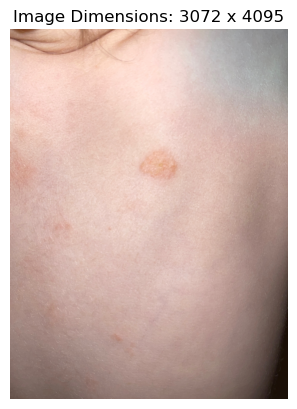

In [106]:
import boto3
import io
from PIL import Image
import matplotlib.pyplot as plt
from botocore.client import Config

# AWS S3 Configuration
access_key = 'UAZG5H4B22JSKAB0NETK'
secret = 'YuZ4hC9NORjRVhK84xbPufzS9dBtzv4pqSAtYZZR'
image_bucket_name = 'labeled-data'
region_name = 'eu-de'
endpoint_url = 'https://obs.eu-de.otc.t-systems.com'

# Initialize S3 Client
session = boto3.session.Session()
s3_client = session.client(
    service_name='s3',
    aws_access_key_id=access_key,
    aws_secret_access_key=secret,
    endpoint_url=endpoint_url,
    config=Config(signature_version='s3v4')
)

# The image file name (make sure the file name is correct)
image_key = 'g3pc51vwa97nqt5nan8xh9e2sct0'

# Retrieve the image from the S3 bucket
response = s3_client.get_object(Bucket=image_bucket_name, Key=image_key)

# Read the image data
image_data = response['Body'].read()

# Open the image using PIL
image = Image.open(io.BytesIO(image_data))

# Get the image dimensions
image_width, image_height = image.size

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for better presentation
plt.title(f"Image Dimensions: {image_width} x {image_height}")
plt.show()


In [146]:
df6=pd.read_csv("matched_data3.csv")

In [147]:
df6.head()

media_id                     image_key
0      NaN  4ej4exnv1w3pnantor3i2qmp5dg6
1      NaN  g3pc51vwa97nqt5nan8xh9e2sct0
2      NaN  os2ydl862g67frc1vavjj99onanz
3      NaN  rynunanengfo6wcohpja1u4xxrxn
4      NaN  4ej4exnv1w3pnantor3i2qmp5dg6

In [148]:
# Remove rows where 'id' is NaN
#df6 = df6.dropna(subset=['media_id'])

In [149]:
#df6.to_csv("cleaned_diagnosis_data.csv", index=False)

In [150]:
#df6.head()

In [151]:
len(df6)

138896

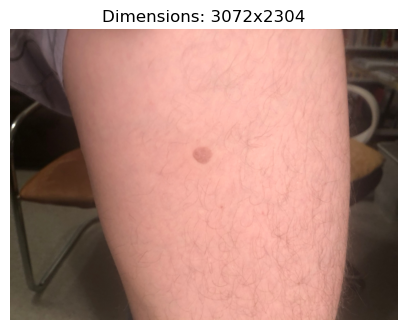

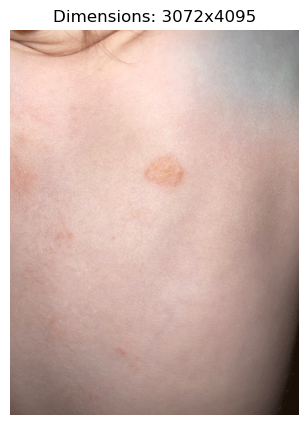

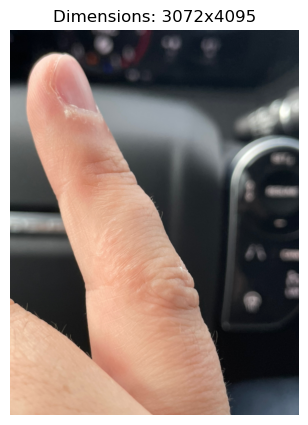

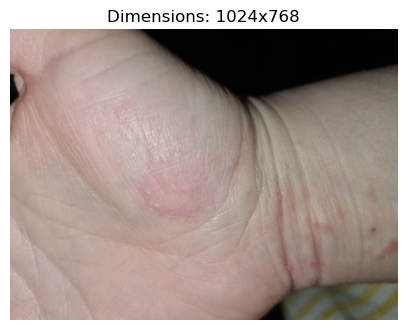

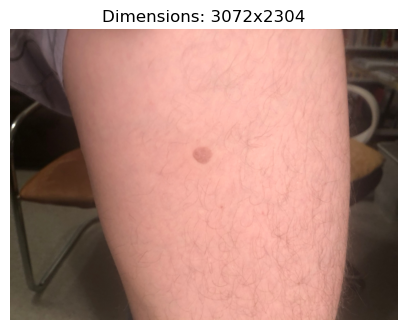

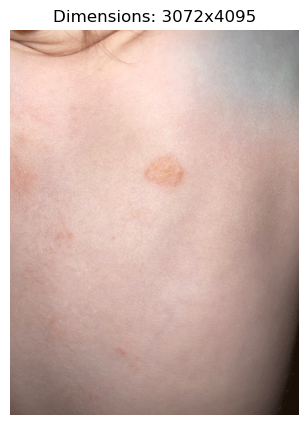

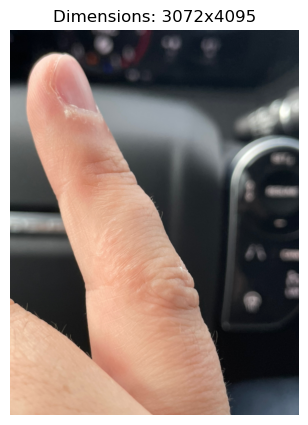

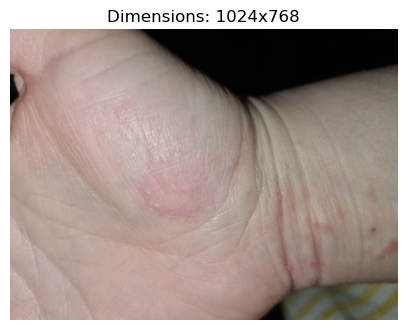

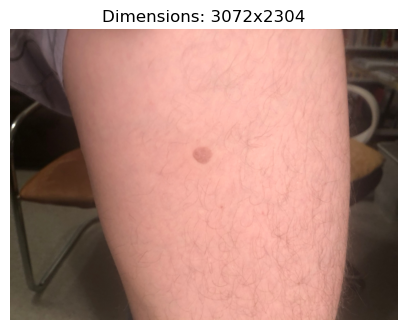

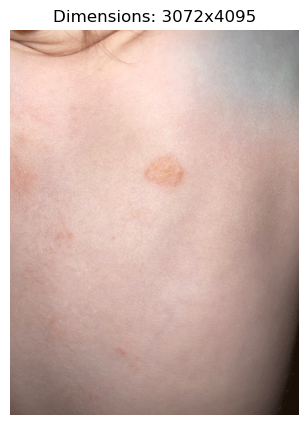

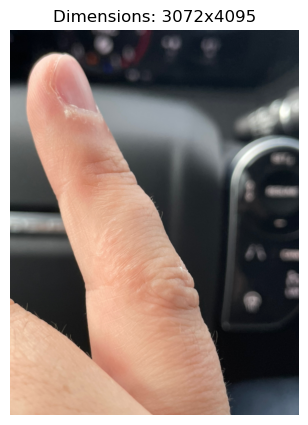

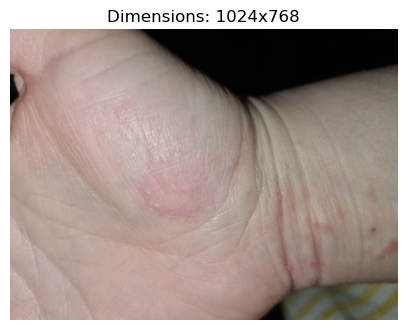

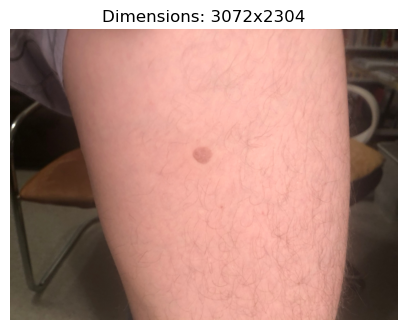

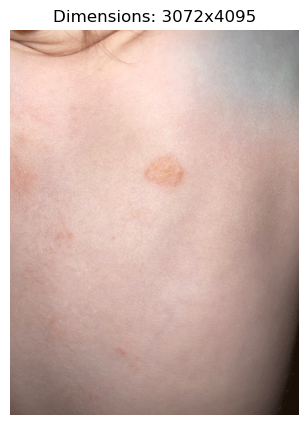

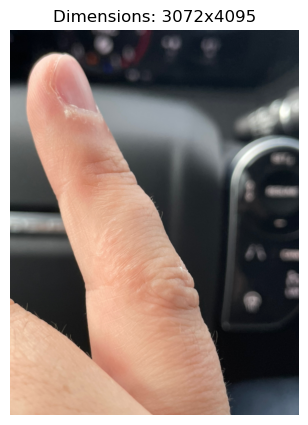

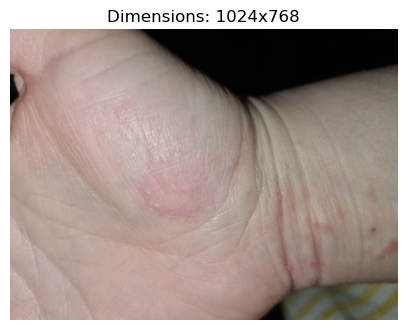

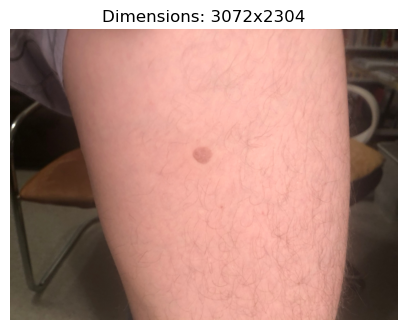

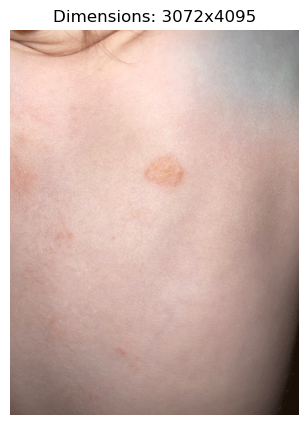

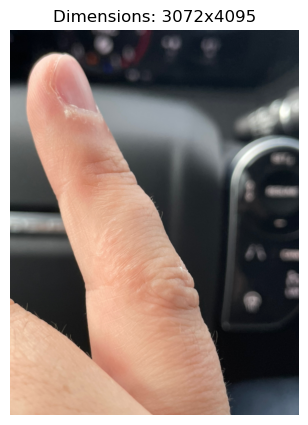

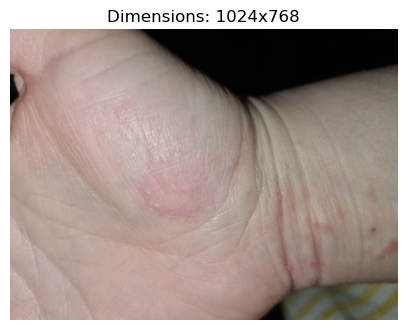

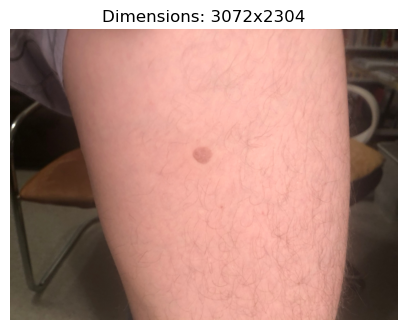

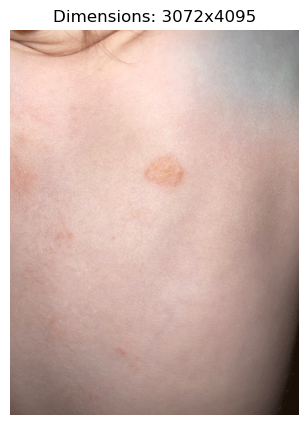

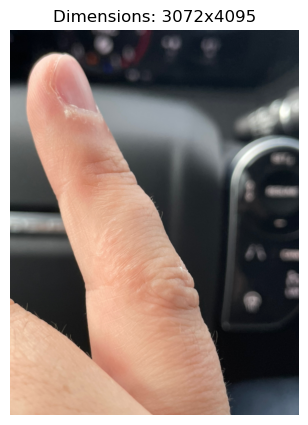

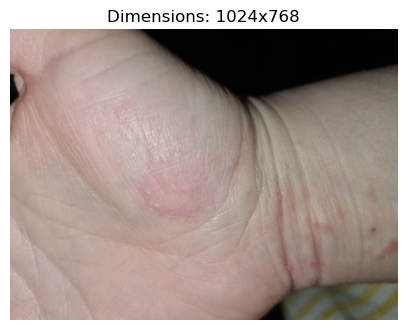

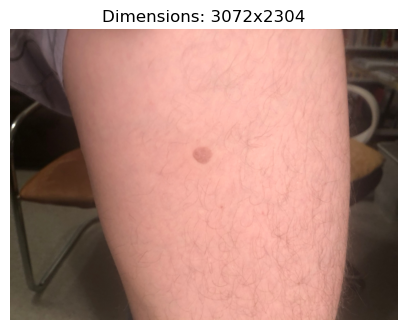

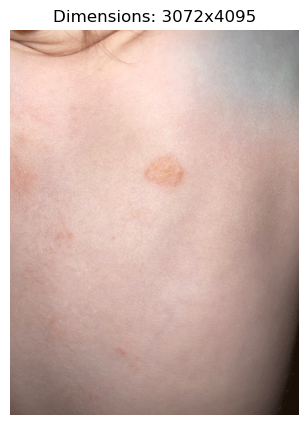

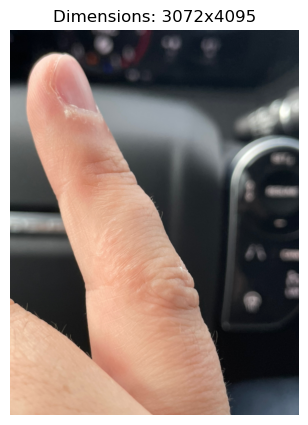

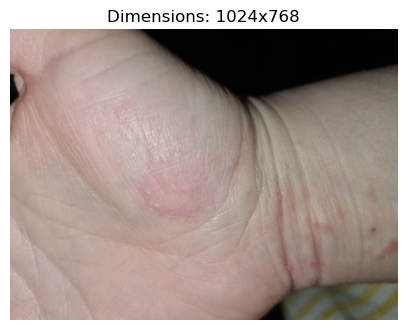

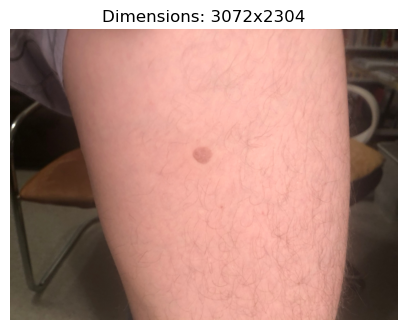

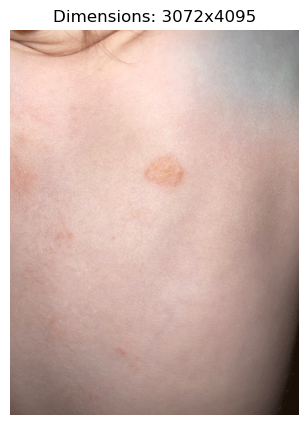

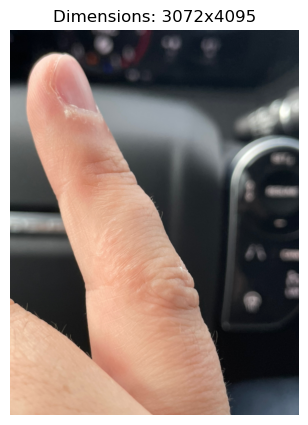

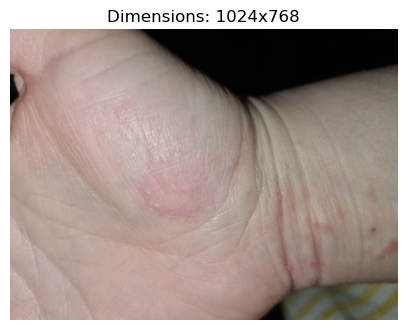

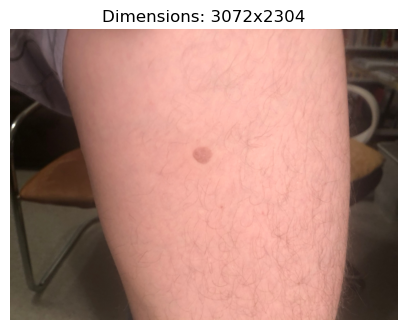

KeyboardInterrupt: 

In [152]:
import boto3
from botocore.client import Config
import io
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

# AWS S3 Configuration
access_key = 'UAZG5H4B22JSKAB0NETK'
secret = 'YuZ4hC9NORjRVhK84xbPufzS9dBtzv4pqSAtYZZR'
image_bucket_name = 'labeled-data'
region_name = 'eu-de'
endpoint_url = 'https://obs.eu-de.otc.t-systems.com'

# Initialize S3 Client
session = boto3.session.Session()
s3_client = session.client(
    service_name='s3',
    aws_access_key_id=access_key,
    aws_secret_access_key=secret,
    endpoint_url=endpoint_url,
    config=Config(signature_version='s3v4')
)


# Creating the DataFrame
df = df6

# Function to fetch and plot image from S3, along with its dimensions
def fetch_and_plot_image(image_key):
    try:
        # Fetch image from S3
        image_obj = s3_client.get_object(Bucket=image_bucket_name, Key=image_key)
        image_data = image_obj['Body'].read()

        # Open image using PIL
        image = Image.open(io.BytesIO(image_data))

        # Get image dimensions
        width, height = image.size

        # Plot image
        plt.figure(figsize=(5,5))
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Dimensions: {width}x{height}")
        plt.show()

        # Return the dimensions
        return width, height

    except Exception as e:
        print(f"Error fetching image {image_key}: {e}")
        return None

# Fetch and display images with dimensions
image_dimensions = []
for index, row in df.iterrows():
    image_key = row['image_key']
    dimensions = fetch_and_plot_image(image_key)
    image_dimensions.append((image_key, dimensions))

# Printing out the dimensions for each image key
print("Image Dimensions:")
for image_key, dimensions in image_dimensions:
    print(f"Image Key: {image_key} - Dimensions: {dimensions}")


In [92]:
import pandas as pd

# Assuming your data is already loaded into DataFrames df1 and df2

# Perform an inner join to merge the datasets on 'media_id'
merged_df = pd.merge(df, df6, on='media_id', how='inner')

# Check for any discrepancies in media_id values
print(f"Number of matching records: {len(merged_df)}")
print(f"Number of records in df: {len(df)}")
print(f"Number of records in df6: {len(df6)}")






Number of matching records: 15511
Number of records in df: 93862
Number of records in df6: 15511


In [93]:
# Show the first few rows of the merged data
merged_df.head()

media_id            file_name icd_code  \
0  0ff8d332-1ea5-4c4c-a777-c5699e540897  media-libraryuxOoca   H01.11   
1  c700d5d3-95f5-4469-8063-f9e8b2086378  media-libraryXKASKV   H01.11   
2  dbb791b1-f346-4af7-89cc-802d8c8d5e98  media-library5Mjpk7   H01.11   
3  13933de1-b5b7-4d39-90d9-3f8bf36532b4  media-library0347S4    B35.1   
4  226a1dc9-decf-4dcc-9ba9-9c82504dc2f0  media-libraryiSurwv    B35.1   

       diagnose diagnose_type  \
0      Lidekzem    Secured on   
1      Lidekzem    Secured on   
2      Lidekzem    Secured on   
3  Onychomykose    Secured on   
4  Onychomykose    Secured on   

                                           image_key  
0  images/0ff8d332-1ea5-4c4c-a777-c5699e540897/me...  
1  images/c700d5d3-95f5-4469-8063-f9e8b2086378/me...  
2  images/dbb791b1-f346-4af7-89cc-802d8c8d5e98/me...  
3  images/13933de1-b5b7-4d39-90d9-3f8bf36532b4/me...  
4  images/226a1dc9-decf-4dcc-9ba9-9c82504dc2f0/me...

In [94]:
len(merged_df)

15511

In [97]:
# Save the merged DataFrame to a CSV file
merged_df.to_csv('Periorale Dermatitis Dataset.csv', index=False)



In [96]:
print("Unique ICD Codes:", merged_df["icd_code"].unique())
print("Unique Diagnoses:", merged_df["diagnose"].unique())
print("Unique Diagnose Types:", merged_df["diagnose_type"].unique())


Unique ICD Codes: ['H01.11' 'B35.1' 'B35.0' 'L82' 'L50.8' 'L30.0' 'D22.L' 'L01.0' 'L30.8'
 'I83.1' 'L20.9' 'L71.9' 'B35.4' 'B07' 'L73.9' 'C44.9' 'B00.1' 'L30.91'
 'L28.0' 'B86' 'L70.01' 'T14.0' 'L30.9' 'A63' 'L25.9' 'L20.8' 'L70.9'
 'L71.0' 'D22.9' 'L30.1' 'B37.41' 'L64.9' 'T14.03' 'D04.9' 'D36.1' 'B35.3'
 'I78.1' 'B08.1' 'L28.2' 'L85' 'L21.9' 'L02.9' 'L60.9' 'B36.0' 'L85.0'
 'L72.9' 'L30.59' 'L28.1' 'L66.2' 'L42' 'B02' 'B35.9' 'D23.3' 'L85.3'
 'L08.0' 'L64.8' 'A60.0' 'L90.4' 'A69.2' 'L30.12' 'L60.8' 'L81.1' 'A53.9'
 'L92.0' 'L57.4' 'L56.0' 'L73.2' 'D23.9' 'L40.1' 'L40.0' 'B09' 'L94.0'
 'L60.32' 'L73.0' 'L03.0-' 'L98.9' 'L30.49' 'T14.08' 'L91.0' 'L84' 'L63.9'
 'L70.8' 'L23.9' 'L40.84' 'B08.4' 'L98.0' 'D48.5' 'L70.0' 'L81.4' 'K13.0'
 'D23.L' 'I77.6' 'K14.9' 'L57.0' 'B76.9' 'L05.9' 'L13.0' 'L27.0' 'L72.0'
 'L65.9' 'B35.2' 'L53.1' 'T30.0' 'L70.1' 'L72.1' 'M72.1' 'L70.4' 'L03.01'
 'E88.28' 'L60.1' 'L11.0' 'L56.4' 'L55.9' 'A56.0' 'D18.01' 'B65. 3 '
 'A49.9' 'Q28.88' 'B08.30' 'D69.2' 'L81.92

In [100]:
df=pd.read_csv("Periorale Dermatitis Dataset.csv")

In [101]:
df.head()

media_id            file_name icd_code  \
0  0ff8d332-1ea5-4c4c-a777-c5699e540897  media-libraryuxOoca   H01.11   
1  c700d5d3-95f5-4469-8063-f9e8b2086378  media-libraryXKASKV   H01.11   
2  dbb791b1-f346-4af7-89cc-802d8c8d5e98  media-library5Mjpk7   H01.11   
3  13933de1-b5b7-4d39-90d9-3f8bf36532b4  media-library0347S4    B35.1   
4  226a1dc9-decf-4dcc-9ba9-9c82504dc2f0  media-libraryiSurwv    B35.1   

       diagnose diagnose_type  \
0      Lidekzem    Secured on   
1      Lidekzem    Secured on   
2      Lidekzem    Secured on   
3  Onychomykose    Secured on   
4  Onychomykose    Secured on   

                                           image_key  
0  images/0ff8d332-1ea5-4c4c-a777-c5699e540897/me...  
1  images/c700d5d3-95f5-4469-8063-f9e8b2086378/me...  
2  images/dbb791b1-f346-4af7-89cc-802d8c8d5e98/me...  
3  images/13933de1-b5b7-4d39-90d9-3f8bf36532b4/me...  
4  images/226a1dc9-decf-4dcc-9ba9-9c82504dc2f0/me...

In [102]:
# Counting occurrences of each diagnosis
diagnose_counts = df["diagnose"].value_counts()

# Display results
print(diagnose_counts)

diagnose
Ekzem                                1076
Periorale Dermatitis                  753
Akne papulopustulosa                  697
Follikulitis                          500
Onychomykose                          488
                                     ... 
Lippenrandhämangiom (Venous Lake)       1
Dellwarzen (impetiginisiert)            1
Aknenarben                              1
Vulvacandidose                          1
Teleangiektasien                        1
Name: count, Length: 301, dtype: int64


In [137]:
df_result = df6.merge(df, on="media_id", how="inner")


In [135]:
df6.head()

media_id                     image_key
260  vhh946nres46nh848k8yrib83gln  vhh946nres46nh848k8yrib83gln
269  mx91j97t6mq1vz3o4s24253s4ew9  mx91j97t6mq1vz3o4s24253s4ew9
270  ss7i7zlo3f5klzexvkw12sxl7amx  ss7i7zlo3f5klzexvkw12sxl7amx
271  4zj7b8a4bd1lbhm7ymmxvytpwyw1  4zj7b8a4bd1lbhm7ymmxvytpwyw1
272  i0god52osasfsb3rylbqd0siw1ph  i0god52osasfsb3rylbqd0siw1ph

In [136]:
df.head()

media_id    gender location_of_lesion diagnose  \
0  rmidma7gymnaitdhcod8ha7v788h  Männlich     ["Arm(Links)"]   Naevus   
1  nx09c4jck1tarotrjqalma3o4vr7  Männlich     ["Arm(Links)"]   Naevus   
2  ui7rm2ny1mv206n6xnmmxo4lvat7  Männlich     ["Arm(Links)"]   Naevus   
3  5jhvutey5u7var15twyphp5inf6i  Männlich    ["Arm(Rechts)"]    Ekzem   
4  jow01q0wqvhwp894cfg0inn6vcmv  Männlich    ["Arm(Rechts)"]    Ekzem   

                                               image allergies  \
0  all_diagnoses/images/rmidma7gymnaitdhcod8ha7v788h      Nein   
1  all_diagnoses/images/nx09c4jck1tarotrjqalma3o4vr7      Nein   
2  all_diagnoses/images/ui7rm2ny1mv206n6xnmmxo4lvat7      Nein   
3  all_diagnoses/images/5jhvutey5u7var15twyphp5inf6i      Nein   
4  all_diagnoses/images/jow01q0wqvhwp894cfg0inn6vcmv      Nein   

  duration_of_lesion allergies.1 medication social_proximity pregnancy  \
0  3 Monate - 1 Jahr        Nein         Ja             Nein       NaN   
1  3 Monate - 1 Jahr        Nein         Ja             Nein       NaN   
2  3 Monate - 1 Jahr        Nein         Ja             Nein       NaN   
3         < 2 Wochen        Nein         Ja             Nein       NaN   
4         < 2 Wochen        Nein         Ja             Nein       NaN   

  unprotected_sex  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [138]:
len(df_result)

7308

In [139]:
len(df_result)

7308

In [140]:
df_result.head()

media_id                     image_key        gender  \
0  vhh946nres46nh848k8yrib83gln  vhh946nres46nh848k8yrib83gln  ["Männlich"]   
1  mx91j97t6mq1vz3o4s24253s4ew9  mx91j97t6mq1vz3o4s24253s4ew9  ["Weiblich"]   
2  ss7i7zlo3f5klzexvkw12sxl7amx  ss7i7zlo3f5klzexvkw12sxl7amx           NaN   
3  4zj7b8a4bd1lbhm7ymmxvytpwyw1  4zj7b8a4bd1lbhm7ymmxvytpwyw1           NaN   
4  i0god52osasfsb3rylbqd0siw1ph  i0god52osasfsb3rylbqd0siw1ph  ["Männlich"]   

     location_of_lesion                diagnose  \
0       ["Bein(Links)"]               Psoriasis   
1  ["Hals", "Dekollté"]                   Ekzem   
2              ["Kopf"]  Seborrhoische Keratose   
3              ["Kopf"]            Follikulitis   
4           ["Gesicht"]                 Rosacea   

                                               image allergies  \
0  all_diagnoses/images/vhh946nres46nh848k8yrib83gln      Nein   
1  all_diagnoses/images/mx91j97t6mq1vz3o4s24253s4ew9        Ja   
2  all_diagnoses/images/ss7i7zlo3f5klzexvkw12sxl7amx      Nein   
3  all_diagnoses/images/4zj7b8a4bd1lbhm7ymmxvytpwyw1        Ja   
4  all_diagnoses/images/i0god52osasfsb3rylbqd0siw1ph      Nein   

  duration_of_lesion allergies.1 medication social_proximity pregnancy  \
0  3 Monate - 1 Jahr        Nein         Ja             Nein       NaN   
1  3 Monate - 1 Jahr          Ja         Ja             Nein      Nein   
2        über 1 Jahr        Nein         Ja             Nein       NaN   
3  3 Monate - 1 Jahr          Ja       Nein             Nein       NaN   
4        über 1 Jahr        Nein       Nein             Nein       NaN   

  unprotected_sex  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [141]:
df_result["bucket"] = "labeled-data"

In [142]:
df_result.head()

media_id                     image_key        gender  \
0  vhh946nres46nh848k8yrib83gln  vhh946nres46nh848k8yrib83gln  ["Männlich"]   
1  mx91j97t6mq1vz3o4s24253s4ew9  mx91j97t6mq1vz3o4s24253s4ew9  ["Weiblich"]   
2  ss7i7zlo3f5klzexvkw12sxl7amx  ss7i7zlo3f5klzexvkw12sxl7amx           NaN   
3  4zj7b8a4bd1lbhm7ymmxvytpwyw1  4zj7b8a4bd1lbhm7ymmxvytpwyw1           NaN   
4  i0god52osasfsb3rylbqd0siw1ph  i0god52osasfsb3rylbqd0siw1ph  ["Männlich"]   

     location_of_lesion                diagnose  \
0       ["Bein(Links)"]               Psoriasis   
1  ["Hals", "Dekollté"]                   Ekzem   
2              ["Kopf"]  Seborrhoische Keratose   
3              ["Kopf"]            Follikulitis   
4           ["Gesicht"]                 Rosacea   

                                               image allergies  \
0  all_diagnoses/images/vhh946nres46nh848k8yrib83gln      Nein   
1  all_diagnoses/images/mx91j97t6mq1vz3o4s24253s4ew9        Ja   
2  all_diagnoses/images/ss7i7zlo3f5klzexvkw12sxl7amx      Nein   
3  all_diagnoses/images/4zj7b8a4bd1lbhm7ymmxvytpwyw1        Ja   
4  all_diagnoses/images/i0god52osasfsb3rylbqd0siw1ph      Nein   

  duration_of_lesion allergies.1 medication social_proximity pregnancy  \
0  3 Monate - 1 Jahr        Nein         Ja             Nein       NaN   
1  3 Monate - 1 Jahr          Ja         Ja             Nein      Nein   
2        über 1 Jahr        Nein         Ja             Nein       NaN   
3  3 Monate - 1 Jahr          Ja       Nein             Nein       NaN   
4        über 1 Jahr        Nein       Nein             Nein       NaN   

  unprotected_sex        bucket  
0             NaN  labeled-data  
1             NaN  labeled-data  
2             NaN  labeled-data  
3             NaN  labeled-data  
4             NaN  labeled-data

In [145]:
df_result.to_csv("All_Diagnosis_Dataset(Label_bucket)02_17_2025.csv",index=False)